In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403afbe21aa0a446f486a5e05134fc8


In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [16]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging.

print("Beginning of Data Retrieval       ")
print("----------------------------------")

# Create counters.

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning of Data Retrieval       
----------------------------------
Processing Record 1 of Set 1 | teya
Processing Record 2 of Set 1 | ekuvukeni
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | tuatapere
Processing Record 10 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | soyo
Processing Record 13 of Set 1 | asau
Processing Record 14 of Set 1 | mehamn
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | san ramon
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | salina
Processing Record 20 of Set 1 | gondanglegi
Processing Record 21 of Set 1 | kapoeta
Processing Record 22 of Set 1 

Processing Record 188 of Set 4 | balykshi
Processing Record 189 of Set 4 | mount darwin
Processing Record 190 of Set 4 | dingle
Processing Record 191 of Set 4 | zhigansk
Processing Record 192 of Set 4 | mbini
Processing Record 193 of Set 4 | cochrane
Processing Record 194 of Set 4 | srandakan
Processing Record 195 of Set 4 | poiana vadului
Processing Record 196 of Set 4 | otavi
Processing Record 197 of Set 4 | kijang
Processing Record 198 of Set 4 | birjand
Processing Record 199 of Set 4 | flinders
Processing Record 200 of Set 4 | rio grande
Processing Record 201 of Set 4 | olafsvik
Processing Record 202 of Set 4 | minot
Processing Record 203 of Set 4 | karamea
City not found. Skipping...
Processing Record 205 of Set 5 | barela
Processing Record 206 of Set 5 | kendari
Processing Record 207 of Set 5 | the valley
Processing Record 208 of Set 5 | fukue
Processing Record 209 of Set 5 | brejo santo
Processing Record 210 of Set 5 | aleksandrov gay
Processing Record 211 of Set 5 | phan rang
C

Processing Record 373 of Set 8 | buta
Processing Record 374 of Set 8 | faya
Processing Record 375 of Set 8 | kulhudhuffushi
Processing Record 376 of Set 8 | kaele
Processing Record 377 of Set 8 | harper
Processing Record 378 of Set 8 | bugasong
Processing Record 379 of Set 8 | batemans bay
Processing Record 380 of Set 8 | lata
Processing Record 381 of Set 8 | xining
Processing Record 382 of Set 8 | kushima
Processing Record 383 of Set 8 | borovsk
Processing Record 384 of Set 8 | mahibadhoo
Processing Record 385 of Set 8 | mezen
Processing Record 386 of Set 8 | sao felix do xingu
Processing Record 387 of Set 8 | oistins
Processing Record 388 of Set 8 | glendive
Processing Record 389 of Set 8 | cidreira
Processing Record 390 of Set 8 | upernavik
Processing Record 391 of Set 8 | cayenne
Processing Record 392 of Set 8 | tomatlan
Processing Record 393 of Set 8 | meulaboh
Processing Record 394 of Set 8 | coahuayana
Processing Record 395 of Set 8 | chebsara
Processing Record 396 of Set 8 | ye

Processing Record 560 of Set 11 | athgarh
City not found. Skipping...
Processing Record 562 of Set 12 | san miguel de cauri
Processing Record 563 of Set 12 | jidong
Processing Record 564 of Set 12 | isangel
Processing Record 565 of Set 12 | vardo
Processing Record 566 of Set 12 | port blair
Processing Record 567 of Set 12 | la ronge
Processing Record 568 of Set 12 | koslan
Processing Record 569 of Set 12 | caucaia
Processing Record 570 of Set 12 | matay
Processing Record 571 of Set 12 | aranos
Processing Record 572 of Set 12 | os
City not found. Skipping...
Processing Record 573 of Set 12 | bargal
City not found. Skipping...
Processing Record 574 of Set 12 | zhangzhou
Processing Record 575 of Set 12 | olinda
Processing Record 576 of Set 12 | norfolk
Processing Record 577 of Set 12 | husavik
Processing Record 578 of Set 12 | gat
Processing Record 579 of Set 12 | tidore
City not found. Skipping...
Processing Record 580 of Set 12 | warqla
City not found. Skipping...
Processing Record 581 

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Teya,RU,2021-10-03 01:12:08,60.3778,92.6267,35.31,92,100,1.86
1,Ekuvukeni,ZA,2021-10-03 01:19:06,-28.4675,30.1551,58.21,78,100,2.89
2,Hasaki,JP,2021-10-03 01:10:28,35.7333,140.8333,75.60,67,0,14.61
3,Albany,US,2021-10-03 01:15:16,42.6001,-73.9662,62.80,87,23,3.58
4,Mataura,NZ,2021-10-03 01:19:06,-46.1927,168.8643,55.47,68,100,2.04
...,...,...,...,...,...,...,...,...,...
550,Victor Harbor,AU,2021-10-03 01:21:13,-35.5667,138.6167,62.47,85,91,3.00
551,Wajir,KE,2021-10-03 01:12:11,1.7471,40.0573,75.16,67,91,10.65
552,Witu,KE,2021-10-03 01:21:13,-2.3889,40.4382,75.36,88,100,7.09
553,Asmar,AF,2021-10-03 01:21:14,35.0333,71.3581,69.40,70,0,5.19


In [20]:
# Create the output file (CSV).
output_data_file = "C:/Users/andre/Documents/Analysis_Projects/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

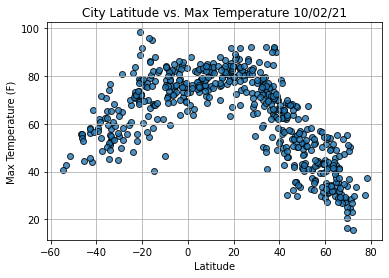

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

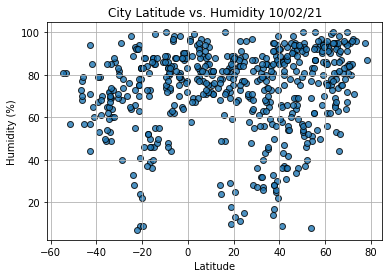

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

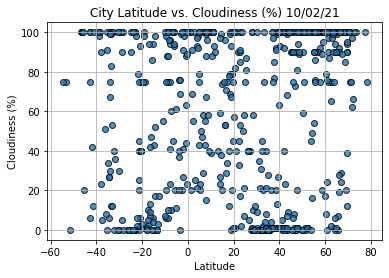

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

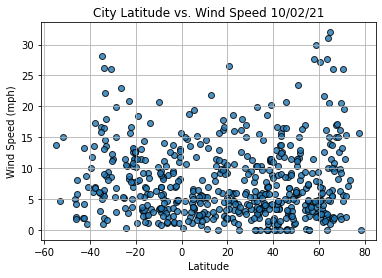

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()